In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
 find_dotenv()

'C:\\Users\\princ\\Desktop\\.env'

In [4]:
load_dotenv()

True

In [5]:
# retrieve API key and store as python variable 
api_key = os.getenv("Alpaca_API_key")
type(api_key)

str

In [6]:
# retrieve API secret key and store as python variable 
api_secret_key = os.getenv("Alpaca_API_secret_key")
type(api_secret_key)

NoneType

# PART 1- Personal Finance Planner

Collect crypto prices using the request library

In [7]:
# set crypto values 
btc_value= 1.2
eth_value = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current BTC price
current_btc_price= requests.get(btc_url).json()
btc_price = current_btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
current_eth_price= requests.get(eth_url).json()
eth_price = current_eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crypto
current_btc = btc_value * btc_price
current_eth = eth_value * eth_price

# Print current crypto wallet balance
print(f"The current value of your {btc_value} BTC is ${current_btc:0.2f}")
print(f"The current value of your {eth_value} ETH is ${current_eth:0.2f}")

The current value of your 1.2 BTC is $51112.80
The current value of your 5.3 ETH is $13382.02


Collect Investements Data Using Alpaca:SPY (stocks) and AGG(bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("secret_key")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key,
    api_version= "v2"
)

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-12-30", tz='America/Chicago').isoformat()
end_date = pd.Timestamp("2023-12-30", tz='America/Chicago').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_prices = api.get_bars(
    tickers, 
    timeframe,
    start= start_date,
    end= end_date 
).df
    

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_prices[closing_prices['symbol']== 'AGG'].drop('symbol',axis=1)
SPY = closing_prices[closing_prices['symbol']== 'SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_ticker

AGG                                      \
                           close    high      low trade_count   open   
timestamp                                                              
2023-01-03 05:00:00+00:00  97.56  97.970  97.3650       50520  97.97   
2023-01-04 05:00:00+00:00  98.10  98.250  97.8900       28989  98.17   
2023-01-05 05:00:00+00:00  98.02  98.060  97.5650       25611  97.64   
2023-01-06 05:00:00+00:00  99.09  99.150  98.0400       28207  98.13   
2023-01-09 05:00:00+00:00  99.34  99.500  99.0000       25377  99.06   
...                          ...     ...      ...         ...    ...   
2023-12-22 05:00:00+00:00  98.83  99.135  98.8050       33780  99.13   
2023-12-26 05:00:00+00:00  99.03  99.080  98.8900       20999  98.93   
2023-12-27 05:00:00+00:00  99.66  99.700  99.3127       29290  99.40   
2023-12-28 05:00:00+00:00  99.44  99.650  99.3127       25735  99.54   
2023-12-29 05:00:00+00:00  99.25  99.425  99.1300       26060  99.20   

                                                   SPY                    \
                             volume       vwap   close    high       low   
timestamp                                                                  
2023-01-03 05:00:00+00:00  19930920  97.592183  380.82  386.43  377.8310   
2023-01-04 05:00:00+00:00  10080087  98.034449  383.76  385.88  380.0000   
2023-01-05 05:00:00+00:00   9682089  97.882355  379.38  381.84  378.7600   
2023-01-06 05:00:00+00:00   8502974  98.849154  388.08  389.25  379.4127   
2023-01-09 05:00:00+00:00   7849643  99.318503  387.86  393.70  387.6700   
...                             ...        ...     ...     ...       ...   
2023-12-22 05:00:00+00:00  13234679  98.888992  473.65  475.38  471.7000   
2023-12-26 05:00:00+00:00   5418487  98.993473  475.65  476.58  473.9900   
2023-12-27 05:00:00+00:00   6919952  99.542508  476.51  476.66  474.8900   
2023-12-28 05:00:00+00:00   7172285  99.454329  476.69  477.55  476.2600   
2023-12-29 05:00:00+00:00   7327722  99.285422  475.31  477.03  473.3000   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2023-01-03 05:00:00+00:00      590240  384.37   74850731  380.957589  
2023-01-04 05:00:00+00:00      632808  383.18   85934098  383.149365  
2023-01-05 05:00:00+00:00      530899  381.72   76970456  380.269250  
2023-01-06 05:00:00+00:00      685781  382.61  104026233  385.245977  
2023-01-09 05:00:00+00:00      549428  390.37   73978071  390.362771  
...                               ...     ...        ...         ...  
2023-12-22 05:00:00+00:00      485465  473.86   67131807  473.800078  
2023-12-26 05:00:00+00:00      348986  474.07   55386952  475.111253  
2023-12-27 05:00:00+00:00      425538  475.44   68000811  475.770446  
2023-12-28 05:00:00+00:00      374241  476.88   77158117  476.774686  
2023-12-29 05:00:00+00:00      604247  476.49  122268009  475.364010  

[250 rows x 14 columns]

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0] 
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.56
Current SPY closing price: $380.82


In [14]:
# Compute the current value of shares
my_spy_value= spy_close_price * my_spy
my_agg_value= agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19041.00
The current value of your 200 AGG shares is $19512.00


Savings Health Analysis

In [15]:
# Set monthly household income
monthly_household_income= 12000

# Consolidate financial assets data
crypto_amt = current_btc + current_eth
shares_amt = my_spy_value + my_agg_value

# Create a dictionary with data
financial_data = {'Asset Type': ['Crypto', 'Shares'],
        'Amount': [crypto_amt, shares_amt]}

# Create savings DataFrame
df_savings = pd.DataFrame(financial_data).set_index('Asset Type')

# Display savings DataFrame
df_savings

,Amount
Asset Type,
Crypto,64494.823
Shares,38553.000


array([<Axes: ylabel='Amount'>], dtype=object)

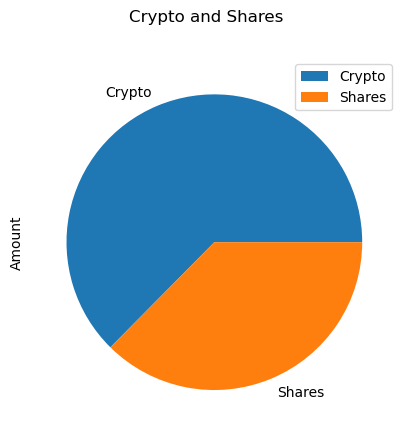

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y= 'Amount', title = "Crypto and Shares", subplots = True)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = crypto_amt + shares_amt

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print(f'Congratulations on reaching this impportant financial goal!')
elif total_savings < emergency_fund:
    print(f'You are $(emergency fund - total_savings) away from reaching your goal')

Congratulations! You have enough money in your emergency fund.


In [18]:
# Initial imports
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz


In [19]:
class MCSimulation:
    """
    A Python class for runnning Monte Carlo simulation on portfolio price data. 
    
    ...
    
    Attributes
    ----------
    portfolio_data : pandas.DataFrame
        portfolio dataframe
    weights: list(float)
        portfolio investment breakdown
    nSim: int
        number of samples in simulation
    nTrading: int
        number of trading days to simulate
    simulated_return : pandas.DataFrame
        Simulated data from Monte Carlo
    confidence_interval : pandas.Series
        the 95% confidence intervals for simulated final cumulative returns
              
    """
    
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        """
        Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
        """
        
        # Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data.xs('close',level=1,axis=1).pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        result= pd.concat([metrics, ci_series])
        return result


# Retirement Planning 

Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_Date = pd.Timestamp('2018-12-30', tz='America/Chicago').isoformat()
end_Date = pd.Timestamp('2023-12-30', tz='America/Chicago').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
five_years_df = api.get_bars(
    tickers, 
    timeframe,
    start= start_Date,
    end= end_Date
).df
    

# Reorganize the DataFrame
# Separate ticker data
AGG = five_years_df[five_years_df['symbol']== 'AGG'].drop('symbol',axis=1)
SPY = five_years_df[five_years_df['symbol']== 'SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis =1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                    SPY                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2018-12-31 05:00:00+00:00  10613435  106.394350  250.08  250.19  247.47   
2019-01-02 05:00:00+00:00  11665497  106.543515  250.23  251.21  245.95   
2019-01-03 05:00:00+00:00   6661940  106.935661  244.15  248.57  243.67   
2019-01-04 05:00:00+00:00   8392420  106.640950  252.39  253.11  247.17   
2019-01-07 05:00:00+00:00   7636381  106.586821  254.29  255.95  251.69   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-12-31 05:00:00+00:00      591024  249.56  147557713  249.158331  
2019-01-02 05:00:00+00:00      603603  245.98  132165224  249.138858  
2019-01-03 05:00:00+00:00      698036  248.23  146823673  245.630167  
2019-01-04 05:00:00+00:00      708230  247.59  145055352  250.484620  
2019-01-07 05:00:00+00:00      449993  252.69  105208591  254.071648

In [22]:
# Check the type of df_stock_data
print(type(df_stock_data))

<class 'pandas.core.frame.DataFrame'>


In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30years = MCSimulation(
    portfolio_data = df_stock_data, 
    num_simulation = 500, 
    num_trading_days= 252*30
)

# Printing the simulation input data
mc_30years.portfolio_data.head()

AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                                 SPY          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2018-12-31 05:00:00+00:00  10613435  106.394350          NaN  250.08  250.19   
2019-01-02 05:00:00+00:00  11665497  106.543515     0.000751  250.23  251.21   
2019-01-03 05:00:00+00:00   6661940  106.935661     0.004129  244.15  248.57   
2019-01-04 05:00:00+00:00   8392420  106.640950    -0.002990  252.39  253.11   
2019-01-07 05:00:00+00:00   7636381  106.586821    -0.001687  254.29  255.95   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-12-31 05:00:00+00:00  247.47      591024  249.56  147557713  249.158331   
2019-01-02 05:00:00+00:00  245.95      603603  245.98  132165224  249.138858   
2019-01-03 05:00:00+00:00  243.67      698036  248.23  146823673  245.630167   
2019-01-04 05:00:00+00:00  247.17      708230  247.59  145055352  250.484620   
2019-01-07 05:00:00+00:00  251.69      449993  252.69  105208591  254.071648   

                                        
                          daily_return  
timestamp                               
2018-12-31 05:00:00+00:00          NaN  
2019-01-02 05:00:00+00:00     0.000600  
2019-01-03 05:00:00+00:00    -0.024298  
2019-01-04 05:00:00+00:00     0.033750  
2019-01-07 05:00:00+00:00     0.007528

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995576,1.006700,0.995232,0.995642,1.005463,0.998027,0.997637,1.006116,0.991104,1.005937,...,1.004065,0.997480,0.997752,0.990243,1.008778,0.990635,0.996393,0.998753,1.001776,1.007061
2,0.991125,1.002799,0.999390,0.989389,1.009713,0.996202,0.995373,1.012515,0.990239,1.003076,...,1.001057,0.992904,0.987400,0.990881,1.012890,0.973290,0.997751,0.995516,1.006923,1.011903
3,0.992946,0.995892,1.007975,0.995848,1.011330,0.996689,0.997667,1.022190,0.983793,1.001982,...,0.994918,0.999684,0.975084,0.986844,1.003309,0.963299,0.987324,0.999861,1.006468,1.000109
4,0.986646,0.993350,1.012809,0.999299,1.018111,0.995859,0.989253,1.017389,0.985276,1.002420,...,0.993343,1.011184,0.983695,0.986923,1.005304,0.964030,0.996069,0.999786,1.020376,1.009768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.448960,16.833596,11.722463,4.351580,4.719949,6.911214,13.306962,13.833586,3.384987,12.198634,...,3.097709,4.528774,3.406505,14.075951,9.139047,4.595022,7.440296,17.503793,12.699477,5.857977
7557,9.476406,16.877760,11.624184,4.356116,4.777973,6.865401,13.269343,13.945847,3.433337,12.241964,...,3.069520,4.496099,3.375545,14.032515,9.227462,4.644000,7.343821,17.486073,12.642473,5.798596
7558,9.465165,16.874940,11.594341,4.362166,4.812136,6.920641,13.415074,13.916092,3.423921,12.221332,...,3.064936,4.512120,3.365930,13.866339,9.096683,4.633367,7.296051,17.462734,12.500567,5.789149
7559,9.446615,16.806401,11.485386,4.404591,4.832189,6.959415,13.363447,13.954719,3.428826,12.281659,...,3.059631,4.559352,3.346382,14.102669,9.076828,4.663089,7.320742,17.443101,12.535657,5.800181


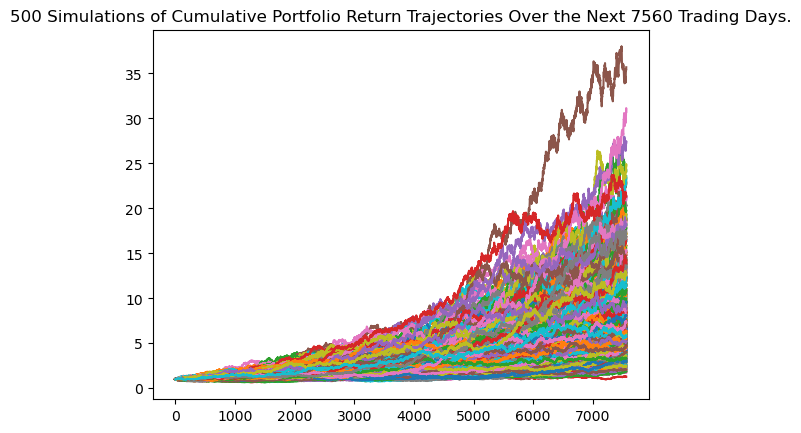

In [25]:
# Plot simulation outcomes
line_plot = mc_30years.plot_simulation()

line_plot.get_figure().savefig("MC_30_year_sim_plot.png", bbox_inches="tight")

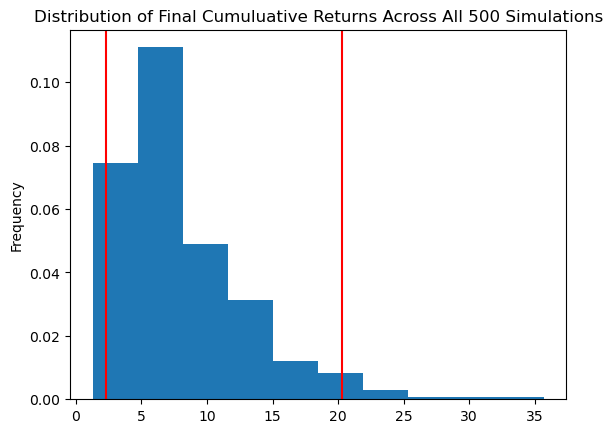

In [26]:
# Plot probability distribution and confidence intervals
distribution_plot = mc_30years.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_30years.summarize_cumulative_return()

summary_stats



count           500.000000
mean              8.046991
std               4.868749
min               1.288012
25%               4.689902
50%               6.941395
75%              10.051910
max              35.691507
95% CI Lower      2.258297
95% CI Upper     20.308171
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45165.95 and $406163.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67748.92 and $609245.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data, 
    num_simulation = 500, 
    num_trading_days= 252*5
)

# Printing the simulation input data
MC_five_years.portfolio_data.head() 

AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                                 SPY          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2018-12-31 05:00:00+00:00  10613435  106.394350          NaN  250.08  250.19   
2019-01-02 05:00:00+00:00  11665497  106.543515     0.000751  250.23  251.21   
2019-01-03 05:00:00+00:00   6661940  106.935661     0.004129  244.15  248.57   
2019-01-04 05:00:00+00:00   8392420  106.640950    -0.002990  252.39  253.11   
2019-01-07 05:00:00+00:00   7636381  106.586821    -0.001687  254.29  255.95   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-12-31 05:00:00+00:00  247.47      591024  249.56  147557713  249.158331   
2019-01-02 05:00:00+00:00  245.95      603603  245.98  132165224  249.138858   
2019-01-03 05:00:00+00:00  243.67      698036  248.23  146823673  245.630167   
2019-01-04 05:00:00+00:00  247.17      708230  247.59  145055352  250.484620   
2019-01-07 05:00:00+00:00  251.69      449993  252.69  105208591  254.071648   

                                        
                          daily_return  
timestamp                               
2018-12-31 05:00:00+00:00          NaN  
2019-01-02 05:00:00+00:00     0.000600  
2019-01-03 05:00:00+00:00    -0.024298  
2019-01-04 05:00:00+00:00     0.033750  
2019-01-07 05:00:00+00:00     0.007528

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011901,1.017819,0.986311,0.991289,0.991952,1.008837,0.997469,0.992188,1.006145,1.007632,...,0.998182,1.004189,0.994617,0.988141,0.991143,0.999476,1.008592,1.018589,0.999208,0.998195
2,1.003681,1.009598,0.989564,0.975147,0.987030,1.010843,0.998277,0.979299,1.008678,0.992852,...,0.995604,1.011787,0.996530,0.981905,0.983842,0.995179,1.007154,1.016630,1.006414,1.002427
3,1.004898,1.007648,0.983945,0.979746,0.993235,1.007767,0.989274,0.985270,1.006899,1.001169,...,0.990750,1.005083,0.988210,0.985617,0.981376,0.996764,1.013503,1.018049,1.013306,0.990523
4,1.012815,1.004507,0.995953,0.979680,0.992633,1.003849,0.981192,0.988637,1.006198,1.005570,...,0.990471,1.007402,0.992990,0.986872,0.977000,0.995241,1.025755,1.014498,1.012588,0.994747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.868579,1.208011,1.622116,1.303952,1.378570,1.295073,1.108000,2.086161,1.490182,2.022795,...,1.330930,1.309973,0.946176,1.148588,1.635496,0.968421,1.572298,1.229209,1.466343,1.341865
1257,1.864751,1.207831,1.620819,1.295543,1.377383,1.300327,1.106554,2.082175,1.491394,2.034500,...,1.316958,1.310109,0.951243,1.159379,1.645018,0.976214,1.578542,1.211395,1.473277,1.332204
1258,1.877693,1.200501,1.621557,1.296768,1.369082,1.302829,1.102325,2.114430,1.489740,2.058157,...,1.332067,1.318398,0.964034,1.163947,1.619872,0.967584,1.563181,1.205963,1.475481,1.336856
1259,1.880007,1.210144,1.635570,1.306119,1.362672,1.299352,1.097935,2.104021,1.504575,2.029184,...,1.306062,1.325715,0.957391,1.171220,1.622590,0.970848,1.566471,1.216301,1.474781,1.339761


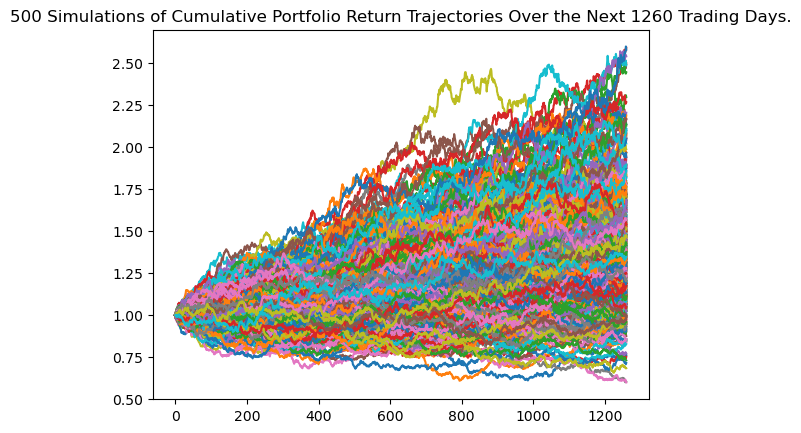

In [34]:
# Plot simulation outcomes
line_plot_2 = MC_five_years.plot_simulation()

line_plot_2.get_figure().savefig("MC_five_year_simulation_plot.png", bbox_inches="tight")

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

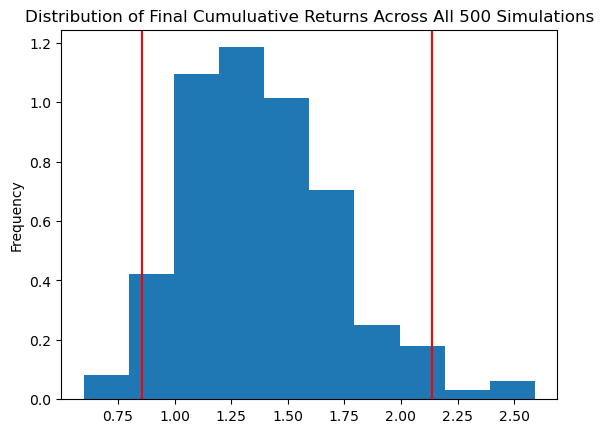

In [35]:
# Plot probability distribution and confidence intervals
MC_five_years.plot_distribution()

In [36]:
metrics = MC_five_years.simulated_return.iloc[-1].describe()
metrics

count    500.000000
mean       1.390622
std        0.334119
min        0.599689
25%        1.142589
50%        1.349258
75%        1.588737
max        2.591210
Name: 1260, dtype: float64

In [37]:
metrics2 = MC_five_years.simulated_return.describe()
metrics2

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,...,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,1.218994,1.014167,1.210394,1.015188,1.118414,1.097207,1.019644,1.440718,1.163072,1.465862,...,1.165326,1.190129,1.034171,1.029601,1.234440,0.971797,1.284894,1.190055,1.109362,1.173296
std,0.253562,0.081555,0.154082,0.089606,0.135327,0.097417,0.042246,0.314308,0.178746,0.213578,...,0.093670,0.130899,0.060510,0.097528,0.197867,0.060729,0.193111,0.073336,0.140514,0.133037
min,0.907091,0.890872,0.927141,0.856772,0.853515,0.876783,0.925793,0.955868,0.868005,0.992852,...,0.982364,0.957712,0.928752,0.875838,0.965511,0.822092,1.000000,1.000000,0.924342,0.899489
25%,1.006293,0.960121,1.139502,0.970105,1.003112,1.008837,0.983992,1.189298,0.991546,1.284444,...,1.064606,1.077136,0.986497,0.939917,1.035272,0.928629,1.096238,1.155665,1.010675,1.101638
50%,1.171008,0.985171,1.195277,0.999360,1.123938,1.116594,1.020106,1.435275,1.184721,1.511293,...,1.187340,1.166042,1.017897,1.008445,1.213288,0.966503,1.291983,1.199237,1.040213,1.176805
75%,1.345929,1.032332,1.273882,1.033816,1.207752,1.174439,1.044864,1.584135,1.250512,1.589782,...,1.245646,1.309973,1.086345,1.133736,1.399785,1.021918,1.480441,1.236948,1.192337,1.297905
max,1.895433,1.249466,1.642463,1.327889,1.435030,1.308521,1.132034,2.240999,1.569210,2.058157,...,1.332995,1.443767,1.175790,1.230780,1.645018,1.105659,1.621256,1.362477,1.475481,1.378846


#### Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_years_descriptive_sum = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(MC_five_years_descriptive_sum)

count           500.000000
mean              1.390622
std               0.334119
min               0.599689
25%               1.142589
50%               1.349258
75%               1.588737
max               2.591210
95% CI Lower      0.853982
95% CI Upper      2.135481
Name: 1260, dtype: float64


In [43]:
# Set initial investment
init_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_five_years_descriptive_sum[8]*init_investment,2)
ci_upper_five = round(MC_five_years_descriptive_sum[9]*init_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $51238.94 and $128128.87


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data, 
    num_simulation = 500, 
    num_trading_days= 252*10
)

# Printing the simulation input data
MC_ten_years.portfolio_data.head() 

AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                                 SPY          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2018-12-31 05:00:00+00:00  10613435  106.394350          NaN  250.08  250.19   
2019-01-02 05:00:00+00:00  11665497  106.543515     0.000751  250.23  251.21   
2019-01-03 05:00:00+00:00   6661940  106.935661     0.004129  244.15  248.57   
2019-01-04 05:00:00+00:00   8392420  106.640950    -0.002990  252.39  253.11   
2019-01-07 05:00:00+00:00   7636381  106.586821    -0.001687  254.29  255.95   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-12-31 05:00:00+00:00  247.47      591024  249.56  147557713  249.158331   
2019-01-02 05:00:00+00:00  245.95      603603  245.98  132165224  249.138858   
2019-01-03 05:00:00+00:00  243.67      698036  248.23  146823673  245.630167   
2019-01-04 05:00:00+00:00  247.17      708230  247.59  145055352  250.484620   
2019-01-07 05:00:00+00:00  251.69      449993  252.69  105208591  254.071648   

                                        
                          daily_return  
timestamp                               
2018-12-31 05:00:00+00:00          NaN  
2019-01-02 05:00:00+00:00     0.000600  
2019-01-03 05:00:00+00:00    -0.024298  
2019-01-04 05:00:00+00:00     0.033750  
2019-01-07 05:00:00+00:00     0.007528

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985463,1.002860,0.998971,1.006312,0.993665,1.002522,0.994770,1.008156,1.011129,1.005127,...,1.008434,0.996405,1.004062,0.994946,1.009773,0.993827,1.000247,0.992257,0.994143,1.000872
2,0.989735,1.006053,0.999526,1.005447,0.987474,1.006108,1.005629,0.998057,1.003540,1.011591,...,1.005898,0.999398,1.010433,0.987813,0.995781,0.992202,1.000396,0.984946,0.993366,0.997697
3,0.985841,1.004279,0.999819,1.000648,0.981559,1.000571,1.014793,1.007364,1.004816,1.009160,...,1.006245,0.992901,0.994147,0.981254,0.994706,0.983704,1.003737,0.998845,0.999435,1.000538
4,0.998085,0.999641,0.995383,1.015233,0.971418,0.998106,1.012752,1.005649,0.999675,1.019910,...,1.008738,0.995072,0.992702,0.973152,0.991100,0.977828,1.016029,0.990519,1.004222,1.004764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.120149,3.097283,2.033298,1.423926,1.042083,2.064278,2.548781,1.887574,1.001213,2.437922,...,1.653705,1.938726,2.190718,1.701845,1.524785,2.026324,1.184358,2.446832,1.721546,2.033525
2517,2.121986,3.110849,2.028866,1.425291,1.052927,2.064617,2.511207,1.900659,1.003440,2.434701,...,1.636869,1.953022,2.179083,1.705119,1.510458,2.026697,1.178846,2.427175,1.751184,2.038330
2518,2.110583,3.085178,2.028599,1.419203,1.042435,2.057340,2.513860,1.908506,0.998786,2.435428,...,1.635405,1.944111,2.174234,1.705634,1.503111,2.026070,1.160147,2.422610,1.756871,2.028225
2519,2.108664,3.082223,2.034996,1.428165,1.041324,2.068572,2.500865,1.901553,0.998309,2.456433,...,1.651754,1.975353,2.175299,1.706659,1.513794,2.062995,1.151804,2.401623,1.752159,2.028795


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

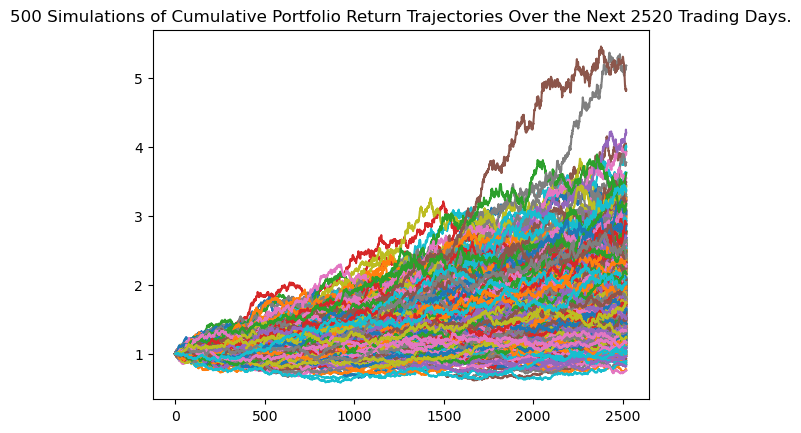

In [47]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

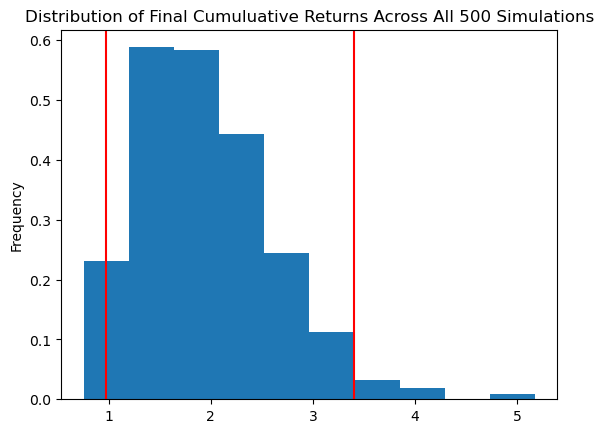

In [48]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_years_descriptive_sum= MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(MC_ten_years_descriptive_sum)

count           500.000000
mean              1.966109
std               0.663341
min               0.756194
25%               1.475398
50%               1.908881
75%               2.377403
max               5.175243
95% CI Lower      0.969629
95% CI Upper      3.402234
Name: 2520, dtype: float64


In [50]:
# Set initial investment
init_investment_2= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_five_years_descriptive_sum[8]*init_investment,2)
ci_upper_ten = round(MC_five_years_descriptive_sum[9]*init_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $51238.94 and $128128.87
